<a href="https://colab.research.google.com/github/AbhishekKaushikCV/HCI/blob/main/P_7711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Participant:7711
 
## Data Analysis
- Application_data
- Notification_data
- Device_data

### Application_data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from pathlib import Path

# Find all the folders
root_dir = Path('/shome/ws2021/group9/dataset/fd249093-60d2-4d4f-99d0-3e98954f7711/fd249093-60d2-4d4f-99d0-3e98954f7711')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*application_data.txt'):
        all_filenames.append(f.name)

In [ ]:
folders

In [ ]:
all_filenames

In [3]:
# Open and load the file  
for f in list(set(all_filenames)):
    app_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["application_data"] 
            temp_df = pd.DataFrame(data)
            app_data = app_data.append(temp_df,ignore_index=True)           

In [4]:
app_data

,name,time,timeDate
0,com.huawei.android.launcher,418242517498629,14.08.2019 22:39:37.303
1,com.netflix.mediaclient,418262035027271,14.08.2019 22:39:56.820
2,com.huawei.android.launcher,418539335711083,14.08.2019 22:44:34.121
3,com.android.systemui,418540428407958,14.08.2019 22:44:35.214
4,com.huawei.android.launcher,418542462555354,14.08.2019 22:44:37.248
...,...,...,...
730,com.huawei.android.launcher,1079110588773309,22.08.2019 14:14:38.374
731,com.android.calculator2,1079111629919143,22.08.2019 14:14:39.415
732,com.huawei.android.launcher,1079172851460800,22.08.2019 14:15:40.637
733,ch.ethz.inf.vs.staals.visualattentionrecorder,1079173419984758,22.08.2019 14:15:41.205


In [5]:
# Sort the values by timeDate
app_data = app_data.sort_values(by=['timeDate'],ignore_index=True)

In [6]:
app_data

,name,time,timeDate
0,com.huawei.android.launcher,453886603627243,09.08.2019 00:19:53.046
1,com.google.android.gm,453888156162139,09.08.2019 00:19:54.598
2,com.huawei.android.launcher,453933167223590,09.08.2019 00:20:39.609
3,ch.ethz.inf.vs.staals.visualattentionrecorder,453933673994423,09.08.2019 00:20:40.116
4,com.google.android.gm,453936877236089,09.08.2019 00:20:43.319
...,...,...,...
730,ch.ethz.inf.vs.staals.visualattentionrecorder,1194522518849319,23.08.2019 22:18:12.193
731,com.huawei.android.launcher,1194536550817025,23.08.2019 22:18:26.225
732,com.contextlogic.wish,1194537057995671,23.08.2019 22:18:26.733
733,com.huawei.android.launcher,1194725318710747,23.08.2019 22:21:34.993


In [13]:
# Export dataframe to csv file 
app_data.to_csv(r'/shome/ws2021/group9/dataset/app_data.csv',index=False)

In [7]:
# How many different apps?
print(app_data['name'].describe())

count                             735
unique                             36
top       com.huawei.android.launcher
freq                              312
Name: name, dtype: object


- 36 different apps were used by the participant during the data recording
- There are total 735 switches from one app to another (Including launcher and attention recorder)

<AxesSubplot:>

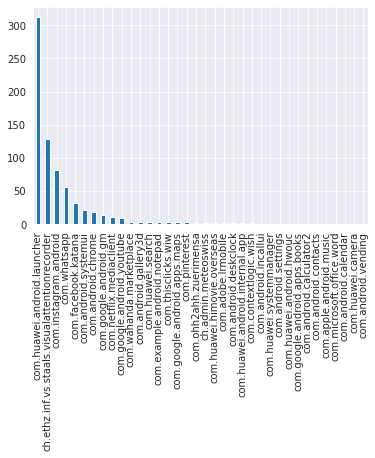

In [12]:
k= app_data.name.value_counts()
k.plot(kind='bar')

In [9]:
# Start and End time of the data recording
print("Start time Date:",app_data["timeDate"].min())
print("End time Date:",app_data["timeDate"].max())

Start time Date: 09.08.2019 00:19:53.046
End time Date: 23.08.2019 22:21:35.499


In [14]:
# Exclude attention recorder app

mask = app_data['name'].isin(['ch.ethz.inf.vs.staals.visualattentionrecorder'])
app_data_m = app_data[~mask]

In [15]:
print(app_data_m['name'].describe())

count                             606
unique                             35
top       com.huawei.android.launcher
freq                              312
Name: name, dtype: object


- After removing the system launcher app there are 606 switches
- There are 35 unique apps used by the user
- Instagram is the most used app by the user, 82 times 

In [16]:
# Changed app names
# app_names = app_data.name.unique() # Different app names used in the data
# changed_names = ['google','desklock','apple music','books','instagram','facebook','netflix','systemui','whatsapp','systemmanager','chrome',
                 #'huawei_hwouc','youtube','huawi_search','wahanda_marketplace','zuerimensa'] # New app names

# app_data = app_data.replace(to_replace=app_names,value=changed_names) # Replace old names by new names
# print(app_data)

In [16]:
# How many times an app is used?
app_counts = app_data_m.name.value_counts()
app_counts


com.huawei.android.launcher        312
com.instagram.android               82
com.whatsapp                        56
com.facebook.katana                 32
com.android.systemui                21
com.android.chrome                  18
com.google.android.gm               14
com.netflix.mediaclient             11
com.google.android.youtube          10
com.wahanda.marketplace              4
com.android.gallery3d                4
com.huawei.search                    4
com.example.android.notepad          3
com.thisclicks.wiw                   3
com.google.android.apps.maps         3
com.pinterest                        3
com.ohh2ahh.zuerimensa               2
ch.admin.meteoswiss                  2
com.huawei.himovie.overseas          2
com.adobe.lrmobile                   2
com.android.deskclock                2
com.huawei.android.internal.app      2
com.contextlogic.wish                2
com.android.incallui                 1
com.huawei.systemmanager             1
com.android.settings     

<AxesSubplot:title={'center':'Frequency of the apps'}>

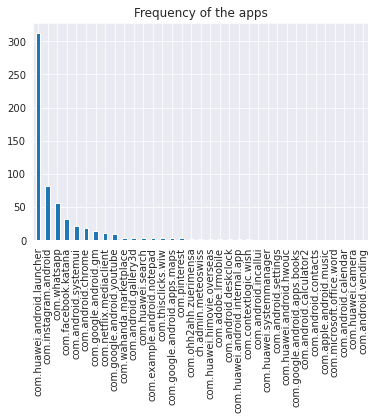

In [17]:
app_counts.plot(kind='bar',title='Frequency of the apps')

     - Instagram (82 times) and whatsapp (56) are the most used apps by the user
     - Least used apps are: books, youtube, music

In [18]:
# Frequent apps
frequent_apps = app_counts[app_counts>=15]
print("The number of most frequent used apps:",len(frequent_apps))

print("The name of most frequent used apps:\n",frequent_apps)

The number of most frequent used apps: 6
The name of most frequent used apps:
 com.huawei.android.launcher    312
com.instagram.android           82
com.whatsapp                    56
com.facebook.katana             32
com.android.systemui            21
com.android.chrome              18
Name: name, dtype: int64


- On average only 6 apps are used on daily basis

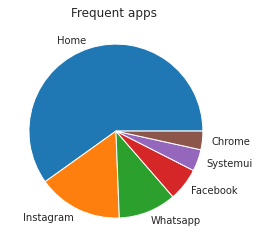

In [19]:
# After excluding attention recorder
labels='Home','Instagram','Whatsapp','Facebook','Systemui','Chrome'
plt.pie(frequent_apps,labels=labels)
plt.title('Frequent apps ')
plt.show()

In [144]:
# Less frequent apps  
l_frequent_apps = app_counts[(app_counts<15)&(app_counts>2)]

print("Number of less frequent apps which the participant used:",len(l_frequent_apps))
l_frequent_apps

Number of less frequent apps which the participant used: 10


com.google.android.gm           14
com.netflix.mediaclient         11
com.google.android.youtube      10
com.wahanda.marketplace          4
com.android.gallery3d            4
com.huawei.search                4
com.example.android.notepad      3
com.thisclicks.wiw               3
com.google.android.apps.maps     3
com.pinterest                    3
Name: name, dtype: int64

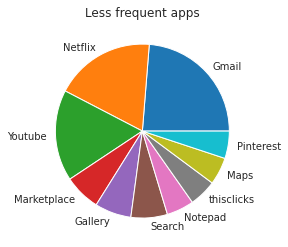

In [145]:
labels='Gmail','Netflix','Youtube','Marketplace','Gallery','Search','Notepad','thisclicks','Maps','Pinterest'
plt.pie(l_frequent_apps,labels=labels)
plt.title('Less frequent apps')
plt.show()

In [146]:
# Apps which are used once
apps_1 = app_counts[app_counts==1]
apps_1

com.android.incallui             1
com.huawei.systemmanager         1
com.android.settings             1
com.huawei.android.hwouc         1
com.google.android.apps.books    1
com.android.calculator2          1
com.android.contacts             1
com.apple.android.music          1
com.microsoft.office.word        1
com.android.calendar             1
com.huawei.camera                1
com.android.vending              1
Name: name, dtype: int64

- Word,books,calculator,camera,music,calendar,contacts are the apps, that are used once 
- 29 apps were not used on a regular basis
- Gmail 14 times and youtube 10 times

### Notification_data

In [147]:
from pathlib import Path

# Find all the folders
root_dir = Path('/shome/ws2021/group9/dataset/fd249093-60d2-4d4f-99d0-3e98954f7711/fd249093-60d2-4d4f-99d0-3e98954f7711')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*notification_data.txt'):
        all_filenames.append(f.name)

In [ ]:
all_filenames

In [149]:
# Open and load the file  
for f in list(set(all_filenames)):
    noti_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["notification_data"] 
            temp_df = pd.DataFrame(data)
            noti_data = noti_data.append(temp_df,ignore_index=True)           

In [150]:
# Sort the values by timeDate
noti_data = noti_data.sort_values(by=['timeDate'],ignore_index=True)

In [151]:
# Notification_data
noti_data

,event,package,category,tag,id,isOngoing,time,timeDate,timeSensor
0,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,453837136395480,09.08.2019 00:19:03.578,1565302743491
1,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,ranker_group1,2147483647,False,453837137382980,09.08.2019 00:19:03.579,1565302743571
2,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1002,True,453837136927251,09.08.2019 00:19:03.579,1565302743543
3,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,453837348988709,09.08.2019 00:19:03.791,1565302743782
4,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,453838074853292,09.08.2019 00:19:04.517,1565302744496
...,...,...,...,...,...,...,...,...,...
5933,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,1193630203029664,23.08.2019 22:03:19.878,1566590599865
5934,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,1194067843772826,23.08.2019 22:10:37.518,1566591037494
5935,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,1194535053747755,23.08.2019 22:18:24.728,1566591504708
5936,posted,com.whatsapp,None,None,11,True,1194584363580560,23.08.2019 22:19:14.038,1566591554016


In [76]:
noti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event       5938 non-null   object
 1   package     5938 non-null   object
 2   category    149 non-null    object
 3   tag         164 non-null    object
 4   id          5938 non-null   int64 
 5   isOngoing   5938 non-null   bool  
 6   time        5938 non-null   int64 
 7   timeDate    5938 non-null   object
 8   timeSensor  5938 non-null   int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 377.0+ KB


<AxesSubplot:>

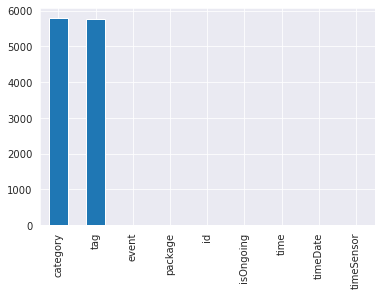

In [77]:
# Total null values in the notification data
noti_data.isna().sum().sort_values(ascending = False).plot(kind='bar')

     - There are too many null values in 'category' and 'tag' columns

In [78]:
# Category Values
category_names = noti_data.category.unique()
category_names

array([None, 'email', 'msg', 'service', 'call', 'transport', 'event'],
      dtype=object)

In [79]:
# Tag values
tag_names = noti_data.tag.unique()
tag_names

array([None, 'ranker_group1', 'gig:-2138516909:^sq_ig_i_personal',
       'c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOjQ1MTc2MTcxMTUyNjY4Nw==',
       '41794788832-1546541104@g.us', '41794788832@s.whatsapp.net',
       'direct|184547055;thread_id:340282366841710300949128114516987833340',
       '41795488404-1561203818@g.us', '41795488404-1360854648@g.us',
       'c3Rvcnk6MTE0MjIwNTg0MToxNTY1NjAxMzI4MDI1MTE3OjQ1MTc2MTcxMTUyNjY4Nw==',
       '447515352863-1443182763@g.us',
       'direct|184547055;thread_id:3645421029678305852036639462',
       '41782589988@s.whatsapp.net', 'HwAudioServiceEx',
       '41786930466@s.whatsapp.net',
       'com.android.server.wm.AlertWindowNotification - com.facebook.orca',
       'ONE_TO_ONE:1093044966:1142205841', '41794788832-1507724209@g.us',
       'MissedCallNotifier', '41788049209-1426335400@g.us',
       '41786980382-1536910426@g.us',
       'direct|184547055;thread_id:340282366841710300949128233675487344698',
       '41764735964-1437045833@g.us',

In [80]:
noti_data.package.describe()

count                                              5938
unique                                               21
top       ch.ethz.inf.vs.staals.visualattentionrecorder
freq                                               5468
Name: package, dtype: object

- User got 5938 total notificications 
- most notifications are from attenrecorder

In [96]:
# Exclude the notification data from android launcher, and attention recorder app
mask = noti_data['package'].isin([ 'ch.ethz.inf.vs.staals.visualattentionrecorder'])
noti_data_m = noti_data[~mask]

In [97]:
noti_data_m

,event,package,category,tag,id,isOngoing,time,timeDate,timeSensor
13,removed,com.google.android.gm,email,gig:-2138516909:^sq_ig_i_personal,0,False,482091855790155,09.08.2019 08:10:01.004,1565329237752
14,removed,com.google.android.gm,email,gig:-2138516909:^sq_ig_i_personal,-448777350,False,482091858480259,09.08.2019 08:10:01.006,1565329237768
15,posted,com.facebook.katana,None,c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOj...,0,False,482456632043223,09.08.2019 08:16:06.074,1565331366045
16,removed,com.facebook.katana,None,c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOj...,0,False,482463885337493,09.08.2019 08:16:13.328,1565331366045
17,posted,com.huawei.systemmanager,None,None,1074241823,False,482640613415070,09.08.2019 08:19:10.056,1565331550025
...,...,...,...,...,...,...,...,...,...
5638,posted,com.adobe.lrmobile,None,None,4,True,1173143367636205,23.08.2019 16:21:53.597,1566570113563
5639,posted,com.adobe.lrmobile,None,None,4,True,1173143367897142,23.08.2019 16:21:53.598,1566570113563
5822,posted,com.buzzfeed.android,None,None,0,False,1182951701355080,23.08.2019 19:05:21.376,1566579921362
5936,posted,com.whatsapp,None,None,11,True,1194584363580560,23.08.2019 22:19:14.038,1566591554016


In [98]:
# Information about package column
noti_data_m.package.describe()

count              470
unique              20
top       com.whatsapp
freq               204
Name: package, dtype: object

- Most notifications are from whatsapp (204)
- 20 different notifications

<AxesSubplot:title={'center':'Notifications'}>

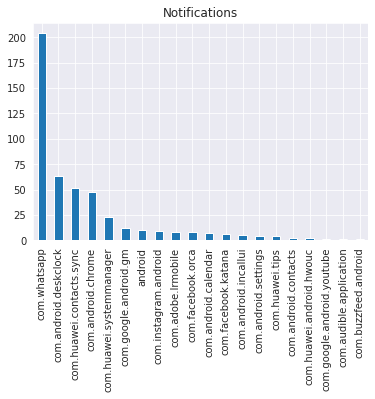

In [99]:
noti_counts= noti_data_m.package.value_counts()
noti_counts.plot(kind = 'bar',title='Notifications')

     - There are  20 unique package's notification 
     - In which 'Whatsapp' is the highest one
     - Deskclock is the second highest

<AxesSubplot:title={'center':'Top 5 apps with notifications'}>

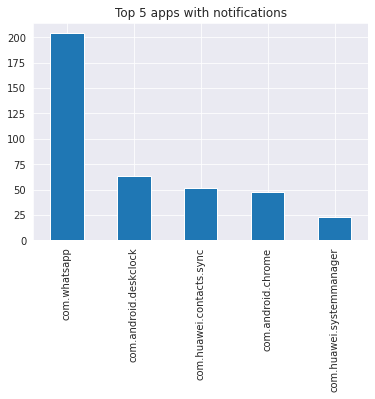

In [100]:
# Top 5 notifications
noti_counts[:5].plot(kind='bar',title='Top 5 apps with notifications')

In [103]:
noti_data

,event,package,category,tag,id,isOngoing,time,timeDate,timeSensor
13,removed,com.google.android.gm,email,gig:-2138516909:^sq_ig_i_personal,0,False,482091855790155,09.08.2019 08:10:01.004,1565329237752
14,removed,com.google.android.gm,email,gig:-2138516909:^sq_ig_i_personal,-448777350,False,482091858480259,09.08.2019 08:10:01.006,1565329237768
15,posted,com.facebook.katana,None,c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOj...,0,False,482456632043223,09.08.2019 08:16:06.074,1565331366045
16,removed,com.facebook.katana,None,c3Rvcnk6MTE0MjIwNTg0MToxNTY1MzMxMzY1ODI4NjkwOj...,0,False,482463885337493,09.08.2019 08:16:13.328,1565331366045
17,posted,com.huawei.systemmanager,None,None,1074241823,False,482640613415070,09.08.2019 08:19:10.056,1565331550025
...,...,...,...,...,...,...,...,...,...
5638,posted,com.adobe.lrmobile,None,None,4,True,1173143367636205,23.08.2019 16:21:53.597,1566570113563
5639,posted,com.adobe.lrmobile,None,None,4,True,1173143367897142,23.08.2019 16:21:53.598,1566570113563
5822,posted,com.buzzfeed.android,None,None,0,False,1182951701355080,23.08.2019 19:05:21.376,1566579921362
5936,posted,com.whatsapp,None,None,11,True,1194584363580560,23.08.2019 22:19:14.038,1566591554016


In [105]:
noti_data.dtypes

event         object
package       object
category      object
tag           object
id             int64
isOngoing       bool
time           int64
timeDate      object
timeSensor     int64
dtype: object

### Correlation between the columns

In [101]:
corr=noti_data.corr()

<AxesSubplot:>

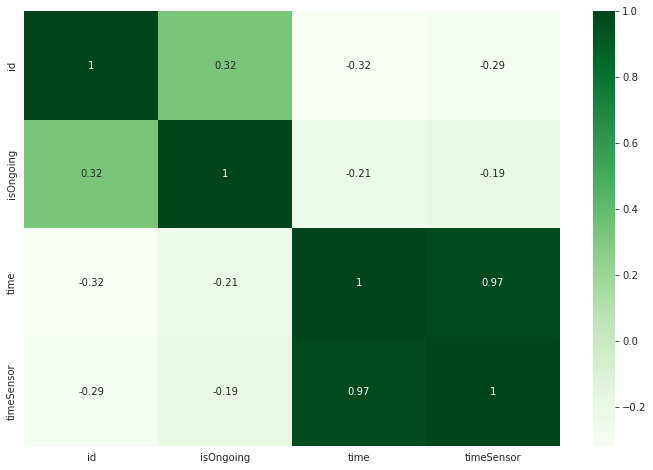

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)

- As we can see there is some correlation between 'id' and 'isOngoing'

In [106]:
# Information about event column
noti_data.event.describe()

count        470
unique         2
top       posted
freq         359
Name: event, dtype: object

In [107]:
# Information about category column
noti_data.category.describe()

count     149
unique      6
top       msg
freq       76
Name: category, dtype: object

In [108]:
noti_data.category.unique()

array(['email', None, 'msg', 'service', 'call', 'transport', 'event'],
      dtype=object)

In [109]:
noti_data.category.value_counts()

msg          76
transport    49
email        10
event         7
service       6
call          1
Name: category, dtype: int64

### Device_data

In [110]:
from pathlib import Path

# Find all the folders
root_dir = Path('/shome/ws2021/group9/dataset/fd249093-60d2-4d4f-99d0-3e98954f7711/fd249093-60d2-4d4f-99d0-3e98954f7711')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*device_data.txt'):
        all_filenames.append(f.name)

In [111]:
len(all_filenames)

128

In [112]:
# Open and load the file  
for f in list(set(all_filenames)):
    device_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["device_data"] 
            temp_df = pd.DataFrame(data)
            device_data = device_data.append(temp_df,ignore_index=True)           

In [113]:
# Sort the values by timeDate
device_data = device_data.sort_values(by=['timeDate'],ignore_index=True)

In [114]:
device_data

,event,val,time,timeDate
0,ACTION_SCREEN_ON,None,453837011098605,09.08.2019 00:19:03.453
1,ACTION_USER_PRESENT,None,453837010982980,09.08.2019 00:19:03.453
2,ACTION_SCREEN_UNLOCKED,None,453837010685063,09.08.2019 00:19:03.453
3,BATTERY_STATUS_CHARGING,AC,453837043432980,09.08.2019 00:19:03.485
4,ACTION_BATTERY_CHANGE,51,453837043091834,09.08.2019 00:19:03.485
...,...,...,...,...
5294,ACTION_AUDIO_MODE_CHANGE,MODE_NORMAL,1194534999458172,23.08.2019 22:18:24.674
5295,ACTION_HEADSET_PLUG,UNPLUGGED,1194535006870151,23.08.2019 22:18:24.682
5296,ACTION_CONNECTIVITY,MOBILE_CONNECT,1194535007717026,23.08.2019 22:18:24.682
5297,ACTION_RINGER_MODE_CHANGED,RINGER_MODE_VIBRATE,1194535008609734,23.08.2019 22:18:24.683


In [115]:
device_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299 entries, 0 to 5298
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   event     5299 non-null   object
 1   val       4596 non-null   object
 2   time      5299 non-null   int64 
 3   timeDate  5299 non-null   object
dtypes: int64(1), object(3)
memory usage: 165.7+ KB


In [116]:
# Total null values in the device data
device_data.isna().sum().sort_values(ascending = False)

val         703
event         0
time          0
timeDate      0
dtype: int64

In [117]:
# Column 'val'
device_data.val.describe()

count                         4596
unique                         279
top       {"current":"0","max":15}
freq                           167
Name: val, dtype: object

In [118]:
# Different values in val column
device_data.val.unique()

array([None, 'AC', '51', '9', 'AUTOMATIC', 'PORTRAIT',
       '{"current":"9","max":15}', '{"current":"0","max":15}',
       'MODE_NORMAL', 'RINGER_MODE_VIBRATE', 'WIFI_CONNECT', '52', '100',
       '204', 'MOBILE_CONNECT', '203', '202', '200', '199', '198', '196',
       '195', '193', '190', '186', '181', '177', '173',
       '{"current":"7","max":15}', '169', '{"current":"6","max":15}',
       '172', '{"current":"5","max":15}', '178', '185', '191', '189',
       '187', '184', '182', '180', '175', '171', '167', '165', '99', '87',
       '63', '80', '68', '72', '77', '79', '78', '76', '75', '74', '71',
       '69', '67', '65', '64', '62', '61', '59', '98', '60', '73',
       '{"current":"4","max":15}', '97', '95', 'LANDSCAPE', '174', '168',
       '161', '154', '148', '143', '137', '131', '126', '121', '116',
       '112', '107', '104', '136', '159', '166', '163', '160', '157',
       '155', '152', '149', '147', '144', '142', '139', '145', '183',
       '179', '176', '94', '164', '156'

In [64]:
# Column 'event'
device_data.event.describe()

count                         5299
unique                          23
top       ACTION_BRIGHTNESS_CHANGE
freq                          2882
Name: event, dtype: object

<AxesSubplot:xlabel='event'>

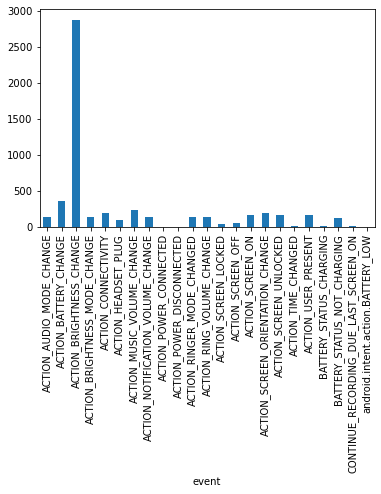

In [65]:
device_data.groupby('event').event.count().plot(kind = 'bar')

     - Brightness change has the highest frequency in the event column

In [66]:
# Name of the events
device_data.event.unique()

array(['ACTION_SCREEN_ON', 'ACTION_USER_PRESENT',
       'ACTION_SCREEN_UNLOCKED', 'BATTERY_STATUS_CHARGING',
       'ACTION_BATTERY_CHANGE', 'ACTION_BRIGHTNESS_CHANGE',
       'ACTION_BRIGHTNESS_MODE_CHANGE',
       'ACTION_SCREEN_ORIENTATION_CHANGE', 'ACTION_RING_VOLUME_CHANGE',
       'ACTION_MUSIC_VOLUME_CHANGE', 'ACTION_NOTIFICATION_VOLUME_CHANGE',
       'ACTION_AUDIO_MODE_CHANGE', 'ACTION_RINGER_MODE_CHANGED',
       'ACTION_CONNECTIVITY', 'BATTERY_STATUS_NOT_CHARGING',
       'ACTION_TIME_CHANGED', 'ACTION_SCREEN_LOCKED', 'ACTION_SCREEN_OFF',
       'CONTINUE_RECORDING_DUE_LAST_SCREEN_ON', 'ACTION_POWER_CONNECTED',
       'ACTION_POWER_DISCONNECTED', 'ACTION_HEADSET_PLUG',
       'android.intent.action.BATTERY_LOW'], dtype=object)

In [67]:
device_data.groupby(['event','val','time','timeDate']).count()

Empty DataFrame
Columns: []
Index: [(ACTION_AUDIO_MODE_CHANGE, MODE_IN_CALL, 494007869102562, 15.08.2019 19:42:24.212), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 18405456404664, 10.08.2019 07:35:13.742), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 24956631685922, 10.08.2019 09:24:24.917), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 25245887675461, 10.08.2019 09:29:14.173), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 29458777693701, 10.08.2019 10:39:27.063), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 29503634104631, 10.08.2019 10:40:11.920), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 30065691373816, 10.08.2019 10:49:33.977), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 31320737738005, 10.08.2019 11:10:29.023), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 37503887811369, 10.08.2019 12:53:30.809), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 45093313049867, 10.08.2019 14:59:59.524), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 57347348532648, 10.08.2019 18:24:15.273), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 57419876669616, 10.08.2019 18:25:27.801), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 112683043218557, 11.08.2019 09:46:30.626), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 141437271130522, 11.08.2019 17:45:45.345), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 141597116295081, 11.08.2019 17:48:25.302), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 141749753190370, 11.08.2019 17:50:57.939), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 142218830248225, 11.08.2019 17:58:47.016), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 142919017432082, 11.08.2019 18:10:27.204), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 143008127709160, 11.08.2019 18:11:54.855), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 145290421575820, 11.08.2019 18:49:56.493), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 145732520285648, 11.08.2019 18:57:18.591), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 146251262790399, 11.08.2019 19:05:57.334), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 207909293545111, 12.08.2019 12:13:46.381), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 208082353576902, 12.08.2019 12:16:39.441), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 209227970555022, 12.08.2019 12:35:45.058), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 210627366811268, 12.08.2019 12:59:04.454), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 212442087959186, 12.08.2019 13:29:20.063), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 220451405351868, 12.08.2019 15:42:52.746), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 290510060018399, 13.08.2019 11:10:35.339), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 291290392512721, 13.08.2019 11:23:35.672), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 305041607525620, 13.08.2019 15:12:49.519), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 308761305550158, 13.08.2019 16:14:49.070), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 330970340252738, 13.08.2019 22:24:58.264), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 331705825342209, 13.08.2019 22:37:13.749), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 332390829087417, 13.08.2019 22:48:38.753), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 334073237264972, 13.08.2019 23:16:40.878), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 334168577738395, 13.08.2019 23:18:16.219), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 334228903906094, 13.08.2019 23:19:16.545), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 369250192538361, 14.08.2019 09:03:02.022), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 372075076629498, 14.08.2019 09:50:06.080), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 378440170499797, 14.08.2019 11:36:11.174), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 383065948860219, 14.08.2019 12:53:16.953), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 399251252713240, 14.08.2019 17:23:04.798), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 418240497549671, 14.08.2019 22:39:35.283), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 418879019082906, 14.08.2019 22:50:13.765), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 419913315175978, 14.08.2019 23:07:28.061), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 420164431686877, 14.08.2019 23:11:39.178), (ACTION_AUDIO_MODE_CHANGE, MODE_NORMAL, 420625013353013, 14.08.2019 23:19

In [68]:
# Exclude the 'ACTION_BRIGHTNESS_CHANGE'
mask = device_data['event'].isin(['ACTION_BRIGHTNESS_CHANGE'])
device_data = device_data[~mask]

In [69]:
device_data

,event,val,time,timeDate
0,ACTION_SCREEN_ON,None,453837011098605,09.08.2019 00:19:03.453
1,ACTION_USER_PRESENT,None,453837010982980,09.08.2019 00:19:03.453
2,ACTION_SCREEN_UNLOCKED,None,453837010685063,09.08.2019 00:19:03.453
3,BATTERY_STATUS_CHARGING,AC,453837043432980,09.08.2019 00:19:03.485
4,ACTION_BATTERY_CHANGE,51,453837043091834,09.08.2019 00:19:03.485
...,...,...,...,...
5294,ACTION_AUDIO_MODE_CHANGE,MODE_NORMAL,1194534999458172,23.08.2019 22:18:24.674
5295,ACTION_HEADSET_PLUG,UNPLUGGED,1194535006870151,23.08.2019 22:18:24.682
5296,ACTION_CONNECTIVITY,MOBILE_CONNECT,1194535007717026,23.08.2019 22:18:24.682
5297,ACTION_RINGER_MODE_CHANGED,RINGER_MODE_VIBRATE,1194535008609734,23.08.2019 22:18:24.683


<AxesSubplot:xlabel='event'>

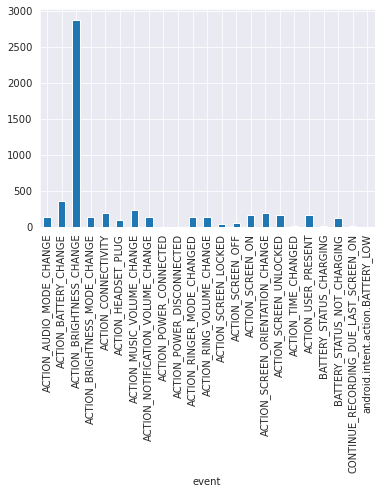

In [119]:
device_data.groupby('event').event.count().plot(kind = 'bar')